# Esercizio 12

L'obiettivo del seguente esercizio è sviluppare e testare diverse reti neurali al fine di riconoscere delle cifre scritte a mano. Il problema è stato affrontato con due diverse tipologie di reti neurali, DNN (Deep Neural Network) e CNN (Convolutional Neural Network). Per DNN si intende un rete densa con più hidden layer mentre per CNN una rete che presenta layer convoluzionali, tipologia utilizzata principalmente per il riconoscimento e la classificazione di immagini. Infatti il problema risulta essere un problema di classificazione, ovvero sviluppare una rete che apprenda come assegnare ad un'immagine la label della categoria corrispondente, che nel caso in esame è il numero corrispondente. 

### DNN
Il dataset utilizzato per il training e validation è composto rispettivamente di $60000$ e $10000$ immagini di cifre, ognuna accoppiata con una label. La struttura della rete DNN utilizzata ([400, 100, D, 10]) è stata testata con 4 diversi ottimizzatori, variando learning rate e decay rate. Le particolarità della rete in esame sono la presenza di un layer Dropout, la scelta della loss function "cross-entropy" e dell'attivatore del layer finale "softmax", usato per avere come output una distribuzione di probabilità rispetto alle classi.

In seguito sono mostrati i risultati ottenuti con : 
- **Adadelta** - lr=1.0, decay=0.0
- **Adam** - lr=0.001 (default value)
- **Adagrad**  -lr=0.1, decay=0.0)
- **Adagrad**  -lr=0.4, decay=0.01

In [37]:
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt
os.environ['KMP_DUPLICATE_LIB_OK']='True' #Serve a risolvere errore "Dead Kernel"
seed=0
np.random.seed(seed) # fix random seed
tf.set_random_seed(seed)

from keras.datasets import mnist
# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits


# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')



X_train shape: (60000, 28, 28)
Y_train shape: (60000,)

60000 train samples
10000 test samples


In [38]:
# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)

# cast floats to single precesion
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

# convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)


from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam

def create_DNN():
    # instantiate model
    model = Sequential()
    # add a dense all-to-all relu layer
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    # add a dense all-to-all relu layer
    model.add(Dense(100, activation='relu'))
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))
    
    return model


def compile_model(optimizer):
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=optimizer,
                  metrics=['accuracy'])
    return model

# training parameters
batch_size = 32
epochs = 9

In [5]:
keras.optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0)
model_delta= compile_model("Adadelta")

history_delta = model_delta.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/9
60000/60000 [==============================] - 51s 857us/step - loss: 0.2929 - accuracy: 0.9127 - val_loss: 0.1155 - val_accuracy: 0.9657
Epoch 2/9
60000/60000 [==============================] - 47s 780us/step - loss: 0.1275 - accuracy: 0.9640 - val_loss: 0.0816 - val_accuracy: 0.9749
Epoch 3/9
60000/60000 [==============================] - 47s 786us/step - loss: 0.0901 - accuracy: 0.9743 - val_loss: 0.0767 - val_accuracy: 0.9780
Epoch 4/9
60000/60000 [==============================] - 49s 820us/step - loss: 0.0742 - accuracy: 0.9793 - val_loss: 0.0799 - val_accuracy: 0.9781
Epoch 5/9
60000/60000 [==============================] - 51s 857us/step - loss: 0.0606 - accuracy: 0.9824 - val_loss: 0.0719 - val_accuracy: 0.9796
Epoch 6/9
60000/60000 [==============================] - 50s 829us/step - loss: 0.0515 - accuracy: 0.9849 - val_loss: 0.0759 - val_accuracy: 0.9810
Epoch 7/9
60000/60000 [==============================] - 50s 

In [6]:
tf.keras.optimizers.Adam()
model_am= compile_model("Adam")

history_am = model_am.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/9
60000/60000 [==============================] - 36s 605us/step - loss: 0.2818 - accuracy: 0.9184 - val_loss: 0.1070 - val_accuracy: 0.9672
Epoch 2/9
60000/60000 [==============================] - 35s 585us/step - loss: 0.1214 - accuracy: 0.9655 - val_loss: 0.0821 - val_accuracy: 0.9747
Epoch 3/9
60000/60000 [==============================] - 36s 593us/step - loss: 0.0886 - accuracy: 0.9736 - val_loss: 0.0765 - val_accuracy: 0.9772
Epoch 4/9
60000/60000 [==============================] - 31s 513us/step - loss: 0.0707 - accuracy: 0.9790 - val_loss: 0.0867 - val_accuracy: 0.9754
Epoch 5/9
60000/60000 [==============================] - 31s 511us/step - loss: 0.0579 - accuracy: 0.9819 - val_loss: 0.0763 - val_accuracy: 0.9817
Epoch 6/9
60000/60000 [==============================] - 31s 516us/step - loss: 0.0476 - accuracy: 0.9849 - val_loss: 0.0712 - val_accuracy: 0.9813
Epoch 7/9
60000/60000 [==============================] - 31s 5

In [7]:
keras.optimizers.Adagrad(lr=0.1, epsilon=None, decay=0.0)
model_grad1= compile_model("Adagrad")

history_grad1 = model_grad1.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/9
60000/60000 [==============================] - 24s 402us/step - loss: 0.2809 - accuracy: 0.9190 - val_loss: 0.1217 - val_accuracy: 0.9620
Epoch 2/9
60000/60000 [==============================] - 23s 388us/step - loss: 0.1421 - accuracy: 0.9597 - val_loss: 0.0935 - val_accuracy: 0.9708
Epoch 3/9
60000/60000 [==============================] - 23s 389us/step - loss: 0.1105 - accuracy: 0.9689 - val_loss: 0.0832 - val_accuracy: 0.9733
Epoch 4/9
60000/60000 [==============================] - 24s 393us/step - loss: 0.0925 - accuracy: 0.9740 - val_loss: 0.0753 - val_accuracy: 0.9757
Epoch 5/9
60000/60000 [==============================] - 23s 388us/step - loss: 0.0788 - accuracy: 0.9780 - val_loss: 0.0700 - val_accuracy: 0.9781
Epoch 6/9
60000/60000 [==============================] - 23s 386us/step - loss: 0.0693 - accuracy: 0.9805 - val_loss: 0.0676 - val_accuracy: 0.9800
Epoch 7/9
60000/60000 [==============================] - 23s 3

In [8]:
keras.optimizers.Adagrad(lr=0.4, epsilon=None, decay=0.01)
model_grad2= compile_model("Adagrad")

history_grad2 = model_grad2.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/9
60000/60000 [==============================] - 24s 393us/step - loss: 0.2976 - accuracy: 0.9145 - val_loss: 0.1294 - val_accuracy: 0.9609
Epoch 2/9
60000/60000 [==============================] - 23s 380us/step - loss: 0.1490 - accuracy: 0.9583 - val_loss: 0.1014 - val_accuracy: 0.9683
Epoch 3/9
60000/60000 [==============================] - 23s 378us/step - loss: 0.1165 - accuracy: 0.9671 - val_loss: 0.0879 - val_accuracy: 0.9728
Epoch 4/9
60000/60000 [==============================] - 23s 380us/step - loss: 0.0972 - accuracy: 0.9727 - val_loss: 0.0779 - val_accuracy: 0.9761
Epoch 5/9
60000/60000 [==============================] - 23s 379us/step - loss: 0.0817 - accuracy: 0.9764 - val_loss: 0.0755 - val_accuracy: 0.9761
Epoch 6/9
60000/60000 [==============================] - 23s 382us/step - loss: 0.0720 - accuracy: 0.9804 - val_loss: 0.0712 - val_accuracy: 0.9780
Epoch 7/9
60000/60000 [==============================] - 23s 3

10000/10000 [==============================] - 1s 62us/step
--ADADELTA--
Test loss: 0.07455374318562663
Test accuracy: 0.9835000038146973
--ADAM--
Test loss: 0.09453185794309554
Test accuracy: 0.9797999858856201
--AGAGRAD LR=0.1 DC=0.0--
Test loss: 0.061485750730044676
Test accuracy: 0.9817000031471252
--AGAGRAD LR=0.4 DC=0.01--
Test loss: 0.06445747230377746
Test accuracy: 0.9797999858856201


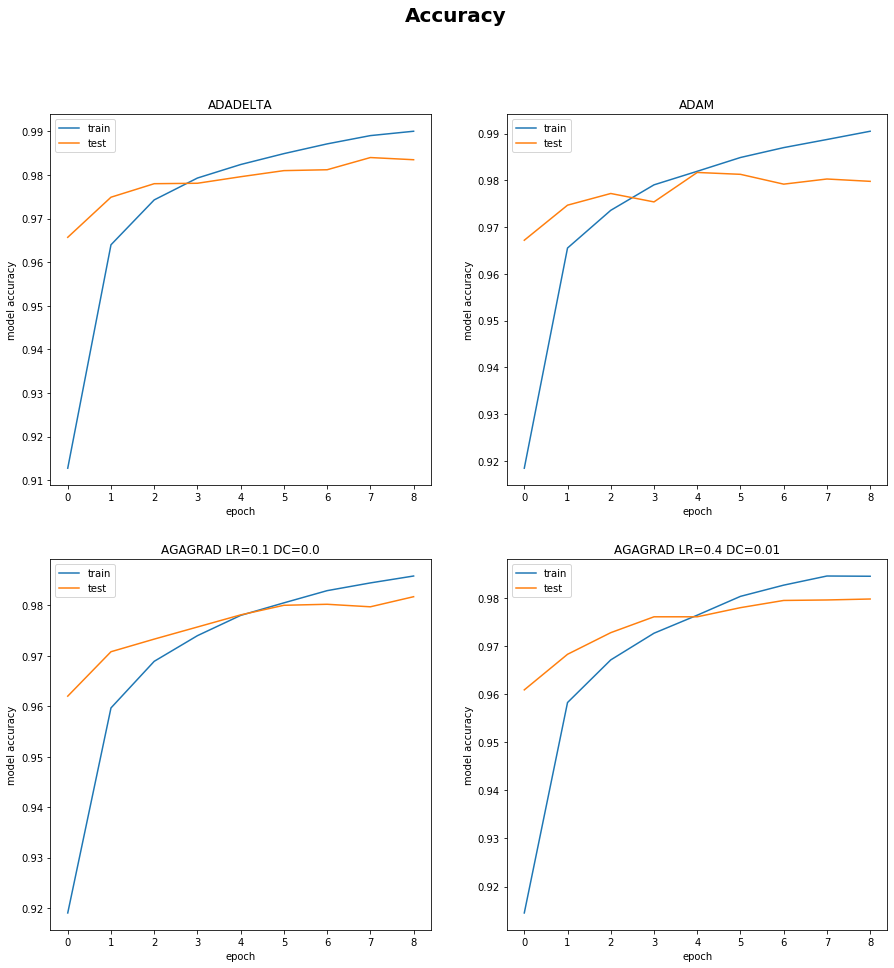

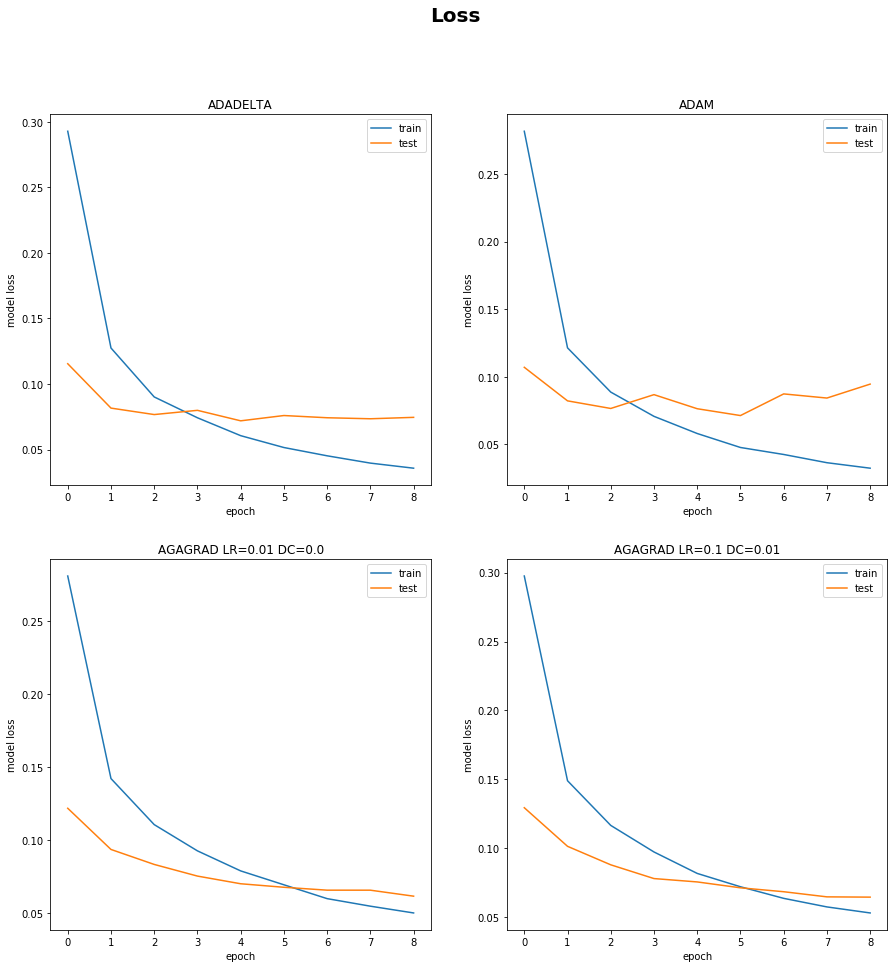

In [9]:
# evaluate model
score_delta = model_delta.evaluate(X_test, Y_test, verbose=1)
score_am = model_am.evaluate(X_test, Y_test, verbose=1)
score_grad1 = model_grad1.evaluate(X_test, Y_test, verbose=1)
score_grad2 = model_grad2.evaluate(X_test, Y_test, verbose=1)


# print performance
print("--ADADELTA--")
print('Test loss:', score_delta[0])
print('Test accuracy:', score_delta[1])

print("--ADAM--")
print('Test loss:', score_am[0])
print('Test accuracy:', score_am[1])

print("--AGAGRAD LR=0.1 DC=0.0--")
print('Test loss:', score_grad1[0])
print('Test accuracy:', score_grad1[1])

print("--AGAGRAD LR=0.4 DC=0.01--")
print('Test loss:', score_grad2[0])
print('Test accuracy:', score_grad2[1])

# look into training history

fig=plt.figure(figsize=(15, 15)) 
fig.suptitle('Accuracy', fontsize=20, fontweight="bold")
# summarize history for accuracy
plt.subplot(221)
plt.plot(history_delta.history['accuracy'])
plt.plot(history_delta.history['val_accuracy'])
plt.title("ADADELTA")
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')

plt.subplot(222)
plt.plot(history_am.history['accuracy'])
plt.plot(history_am.history['val_accuracy'])
plt.title("ADAM")
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')

plt.subplot(223)
plt.plot(history_grad1.history['accuracy'])
plt.plot(history_grad1.history['val_accuracy'])
plt.title("AGAGRAD LR=0.1 DC=0.0")
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')

plt.subplot(224)
plt.plot(history_grad2.history['accuracy'])
plt.plot(history_grad2.history['val_accuracy'])
plt.title("AGAGRAD LR=0.4 DC=0.01")
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

fig=plt.figure(figsize=(15, 15)) 
fig.suptitle('Loss', fontsize=20, fontweight="bold")
# summarize history for loss
plt.subplot(221)
plt.plot(history_delta.history['loss'])
plt.plot(history_delta.history['val_loss'])
plt.title("ADADELTA")
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')

plt.subplot(222)
plt.plot(history_am.history['loss'])
plt.plot(history_am.history['val_loss'])
plt.title("ADAM")
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')

plt.subplot(223)
plt.plot(history_grad1.history['loss'])
plt.plot(history_grad1.history['val_loss'])
plt.title("AGAGRAD LR=0.01 DC=0.0")
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')

plt.subplot(224)
plt.plot(history_grad2.history['loss'])
plt.plot(history_grad2.history['val_loss'])
plt.title("AGAGRAD LR=0.1 DC=0.01")
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

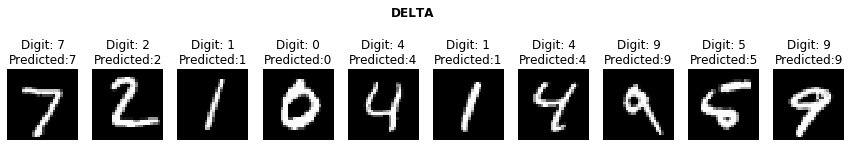

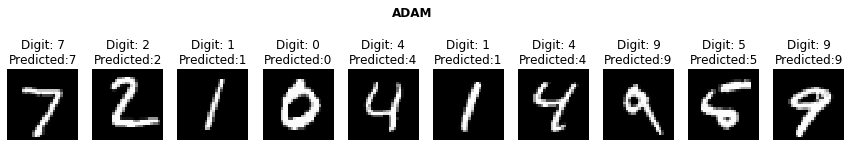

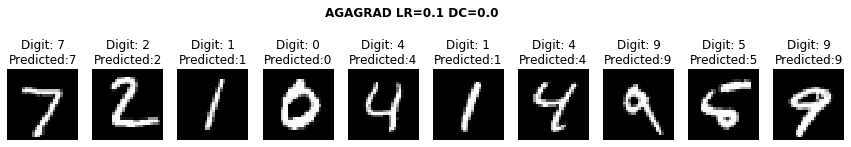

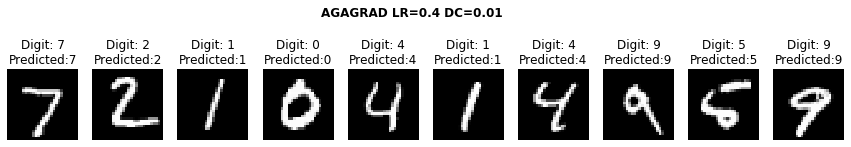

In [10]:
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
predictions_delta = model_delta.predict(X_test)
predictions_am = model_am.predict(X_test)
predictions_grad1 = model_grad1.predict(X_test)
predictions_grad2 = model_grad2.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

fig1=plt.figure(figsize=(15, 5))
fig1.suptitle("DELTA",  fontweight="bold")

for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:{}".format(np.argmax(Y_test[i]), np.argmax(predictions_delta[i])))    
    plt.axis('off') 
plt.show()

fig1=plt.figure(figsize=(15, 5))
fig1.suptitle("ADAM",  fontweight="bold")

for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:{}".format(np.argmax(Y_test[i]), np.argmax(predictions_am[i])))    
    plt.axis('off') 
plt.show()

fig1=plt.figure(figsize=(15, 5))
fig1.suptitle("AGAGRAD LR=0.1 DC=0.0",  fontweight="bold")

for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:{}".format(np.argmax(Y_test[i]), np.argmax(predictions_grad1[i])))    
    plt.axis('off') 
plt.show()

fig1=plt.figure(figsize=(15, 5))
fig1.suptitle("AGAGRAD LR=0.4 DC=0.01",  fontweight="bold")

for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:{}".format(np.argmax(Y_test[i]), np.argmax(predictions_grad2[i])))    
    plt.axis('off') 
plt.show()

### Commento: 
L'ottimizzatore con cui sono stati raggiunti i risultati migliori in termini di loss function risulta essere il terzo, ovvero Adagrad(lr=0.1 e dr=0.0), raggiungendo un'accuratezza del 98%. Infine viene mostato, per ogni ottimizzatore, il risultato dell'analisi su 10 immagini fra quelle utilizzate come validation, per avere un'idea qualitativa dell'input e del risultato della classificazione. 

### CNN

Dopo aver testato le reti DNN, testiamo sullo stesso dataset il funzionamento di una rete CNN. Sono state testate due strutture, una più semplice e una più elaborata, per osservare le differenze prestazionali nella classificazione di immagini con le reti DNN, anche per una rete molto semplice. La prima rete, CNN1 $[10Conv2D(5,5), Maxpool(2,2), Dense(100), Dense(10)]$ presenta un solo layer convoluzionale mentre la rete CNN2 $[10Conv2d(5,5), Maxpool(2, 2), 30Conv2d(3,3), Maxpool(2,2), Dense(100), Dense(50), D, Dense(10)]$ presenta due layer convoluzionali, oltre che far uso di strides, padding e dropout.

Come in precedenza, sono mostrati in seguito i grafici delle curve di apprendimento dei due modelli.

In [41]:
from keras.layers import Flatten, Conv2D, MaxPooling2D

# reshape data, depending on Keras backend
if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000, 10)

60000 train samples
10000 test samples


In [39]:
def create_CNN1():
    # instantiate model
    model = Sequential()
    # add first convolutional layer with 10 filters (dimensionality of output space)
    model.add(Conv2D(10, kernel_size=(5, 5),
                     activation='relu',
                     input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer='SGD',
                  metrics=['accuracy'])
    return model

def create_CNN2():
    # instantiate model
    model = Sequential()
    model.add(Conv2D(10, kernel_size = (5,5), strides = (2,2), padding='same', activation = 'relu', 
                     input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(30, kernel_size=(3, 3),
                    padding='same', activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))

    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer='SGD',
                  metrics=['accuracy'])
    return model

batch_size = 32
epochs = 9

In [7]:

model1=create_CNN1()

# train CNN
history1=model1.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/9
60000/60000 [==============================] - 54s 900us/step - loss: 0.4526 - accuracy: 0.8703 - val_loss: 0.1986 - val_accuracy: 0.9420
Epoch 2/9
60000/60000 [==============================] - 50s 837us/step - loss: 0.1841 - accuracy: 0.9455 - val_loss: 0.1424 - val_accuracy: 0.9588
Epoch 3/9
60000/60000 [==============================] - 52s 871us/step - loss: 0.1338 - accuracy: 0.9603 - val_loss: 0.1018 - val_accuracy: 0.9695
Epoch 4/9
60000/60000 [==============================] - 48s 802us/step - loss: 0.1069 - accuracy: 0.9686 - val_loss: 0.1006 - val_accuracy: 0.9696
Epoch 5/9
60000/60000 [==============================] - 52s 873us/step - loss: 0.0901 - accuracy: 0.9730 - val_loss: 0.0900 - val_accuracy: 0.9728
Epoch 6/9
60000/60000 [==============================] - 52s 859us/step - loss: 0.0779 - accuracy: 0.9769 - val_loss: 0.0699 - val_accuracy: 0.9790
Epoch 7/9
60000/60000 [==============================] - 50s 8

In [8]:
model2=create_CNN2()

# train CNN
history2=model2.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/9
60000/60000 [==============================] - 42s 700us/step - loss: 1.0941 - accuracy: 0.6359 - val_loss: 0.2700 - val_accuracy: 0.9172
Epoch 2/9
60000/60000 [==============================] - 36s 606us/step - loss: 0.3449 - accuracy: 0.8974 - val_loss: 0.1315 - val_accuracy: 0.9608
Epoch 3/9
60000/60000 [==============================] - 37s 613us/step - loss: 0.2444 - accuracy: 0.9281 - val_loss: 0.0978 - val_accuracy: 0.9683
Epoch 4/9
60000/60000 [==============================] - 37s 612us/step - loss: 0.1971 - accuracy: 0.9436 - val_loss: 0.0922 - val_accuracy: 0.9717
Epoch 5/9
60000/60000 [==============================] - 38s 626us/step - loss: 0.1707 - accuracy: 0.9507 - val_loss: 0.0738 - val_accuracy: 0.9766
Epoch 6/9
60000/60000 [==============================] - 37s 611us/step - loss: 0.1555 - accuracy: 0.9564 - val_loss: 0.0695 - val_accuracy: 0.9769
Epoch 7/9
60000/60000 [==============================] - 37s 6

10000/10000 [==============================] - 2s 239us/step
--TEST 1--
Test loss: 0.05848301218096167
Test accuracy: 0.9814000129699707
--TEST 2--
Test loss: 0.057220410216611346
Test accuracy: 0.9812999963760376


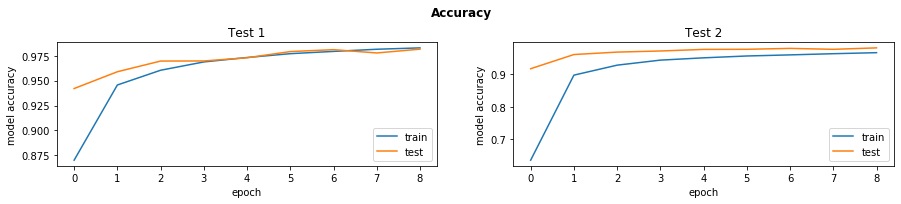

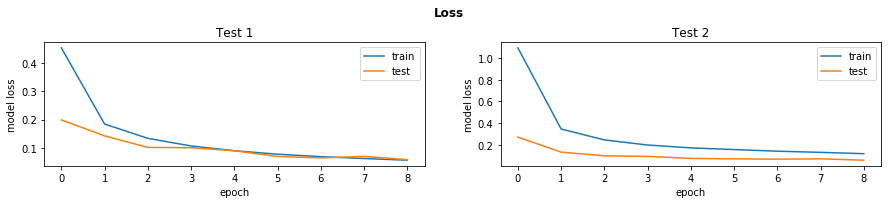

In [44]:
score1 = model1.evaluate(X_test, Y_test, verbose=1)
score2 = model2.evaluate(X_test, Y_test, verbose=1)

print("--TEST 1--")
print('Test loss:', score1[0])
print('Test accuracy:', score1[1])

print("--TEST 2--")
print('Test loss:', score2[0])
print('Test accuracy:', score2[1])
# summarize history for accuracy


fig=plt.figure(figsize=(15, 5))
fig.suptitle("Accuracy",  fontweight="bold")


plt.subplot(221)
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title("Test 1")
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')

plt.subplot(222)
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title("Test 2")
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss

fig=plt.figure(figsize=(15, 5))
fig.suptitle("Loss",  fontweight="bold")


plt.subplot(221)
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title("Test 1")
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')

plt.subplot(222)
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title("Test 2")
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

### Commento: 
In entrambi i casi i modelli presentano un'accuratezza del 98% rispetto alla classificazione del campione validation, come il miglior modello della rete DNN.  
In seguito sono nuovamente mostrate le capacità di classificazione su una differente porzione del campione validation. 

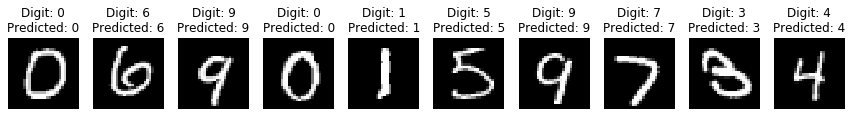

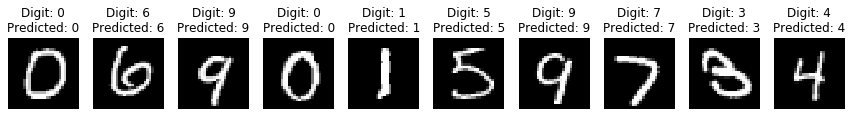

In [47]:
if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)



predictions1 = model1.predict(X_test)
predictions2 = model2.predict(X_test)

#X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i+10, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted: {}".format(np.argmax(Y_test[i+10]), np.argmax(predictions1[i+10])))    
    plt.axis('off') 
plt.show()

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i+10, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted: {}".format(np.argmax(Y_test[i+10]), np.argmax(predictions2[i+10])))    
    plt.axis('off') 
plt.show()

### Confronto DNN e CNN 
Infine si è confrontato il comportamento delle reti sviluppate in precedenza su un dataset personalizzato, differente da quello sul quale è stato allenato. Il dataset è sempre un insieme di immagini 28x28 ma per testare le qualità di classificazione e invarianza traslazionale delle reti precedentemente allenate, si è cercato di posizionare i numeri in varie posizioni all'interno del riquadro e di utilizzare la grafia personale, che può discostarsi di molto rispetto a quelle per mezzo delle quali è stato allenato. 

Sopra ogni numero è stato mostrato in ordine il risultato della classificazione delle 4 reti DNN e delle 2 reti CNN.

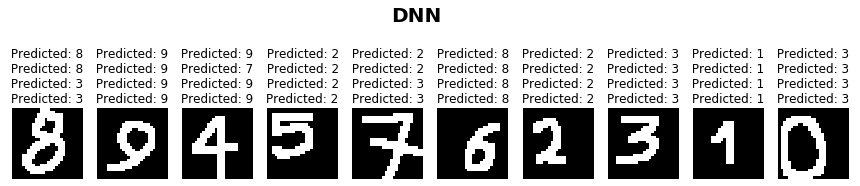

In [106]:
from PIL import Image
import os
import cv2
import glob
import math
img_dir = "numbers/" # Enter Directory of all images 
data_path = os.path.join(img_dir,'*.png')
files = glob.glob(data_path)
numbers = []
for f1 in files:
    img = Image.open(f1).convert('L')
    numbers.append(img)

fig1=plt.figure(figsize=(15, 7))
fig1.suptitle("DNN",  fontweight="bold", fontsize='20')

for k in range(10):
    
    pix=numbers[k].load();
    data = np.zeros((28, 28))
    for j in range(28):
        for i in range(28):
            data[i,j]=pix[j,i]
    data /= 255
    
    data = data.reshape(1,28*28)
    pred_delta = model_delta.predict(data)
    pred_am = model_am.predict(data)
    pred_grad1 = model_grad1.predict(data)
    pred_grad2 = model_grad2.predict(data)
    data = data.reshape(28,28)
    
    ax1 = plt.subplot(2, 10, k + 1)    
    plt.imshow(data, cmap='gray')    
    plt.title(" Predicted: {}".format(np.argmax(pred_delta)) + " \n Predicted: {}".format(np.argmax(pred_am)) + " \n Predicted: {}".format(np.argmax(pred_grad1)) + " \nPredicted: {}".format(np.argmax(pred_grad2)))
   # plt.title("Digit: {}\nPredicted: {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

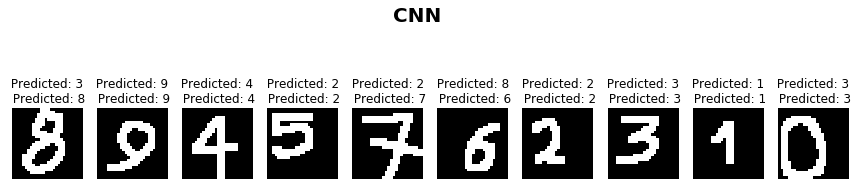

In [118]:
fig1=plt.figure(figsize=(15, 7))
fig1.suptitle("CNN",  fontweight="bold", fontsize='20')

for k in range(10):
    
    pix=numbers[k].load();
    data = np.zeros((28, 28))
    for j in range(28):
        for i in range(28):
            data[i,j]=pix[j,i]
    data /= 255
    
    data = data.reshape(1, 28, 28, 1)
    
   # data = data.reshape(1,28*28)
    pred_1 = model1.predict(data)
    pred_2 = model2.predict(data)
    data = data.reshape(28,28)
    
    ax1 = plt.subplot(2, 10, k + 1)    
    plt.imshow(data, cmap='gray')    
    plt.title(" Predicted: {}".format(np.argmax(pred_1)) + " \n Predicted: {}".format(np.argmax(pred_2)))
   # plt.title("Digit: {}\nPredicted: {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

### Commento: 
I risultati delle reti DNN sono tutti molto simili. Presentano tutte difficoltà nella classificazione dei numeri non centrati come lo $0$ e il $5$, nella classificazione del $4$ e del $7$, probabilmente a causa della differenza di grafia con le cifre del campione viste in precedenza, e della coppia $8$ e $6$ a causa della loro somiglianza. 

Risultati: 
- **Adadelta** - lr=1.0, decay=0.0 ------------ 5/10
- **Adam** - lr=0.001 (default value) ---------- 5/10
- **Adagrad**  -lr=0.1, decay=0.0) ------------- 4/10
- **Adagrad**  -lr=0.4, decay=0.01 ------------ 4/10

In conclusione, i risultati con il nuovo dataset sono lontani da quelli raggiunti con il dataset di validation e la rete con l'ottimizzatore Adagrad, che nella simulazione precedente aveva performato meglio delle altre risulta essere la peggiore, mostrando difficoltà nel generalizzare la classificazione su un campione diverso.


I risultati delle due reti CNN invece differiscono molto sia fra loro che rispetto alle precedenti DNN. Rimane la difficoltà nella classificazione dei numeri meno centrati, come lo $0$ e il $5$, ma per la seconda rete, ovvero la più complessa, tutte le rimanenti criticità sono state superate. In generale anche la rete CNN più semplice ha ottenuto risultati migliori o uguali a tutte le reti DNN, mostrando di avere migliori performance nella classificazione di immagini di cifre.

Risultati:

- **CNN1** --------- 5/10
- **CNN2** --------- 8/10
